In [1]:
from RTER import RegressionTree
from Distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from multiprocessing import Pool

In [2]:
density=TestDistribution(15,1).returnDistribution()
np.random.seed(2)
#X_train,pdf_X_train=density.generate(1000)
X_train= np.arange(0,1,0.001).reshape(-1,1)
Y_train_true = np.sin(X_train).ravel()
Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
Y_train=Y_train_true+Y_train_noise

X_test= np.arange(0,1,0.005).reshape(-1,1)
Y_test_true = np.sin(X_test).ravel()



In [3]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    RT_model=RegressionTree(estimator="naive_estimator",splitter="midpoint",min_samples_split=30,max_depth=5,random_state=1)
    RT_model.fit(X_train,Y_train)
    Y_hat=RT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00035515492866956876

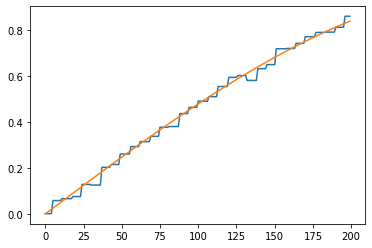

In [4]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Ensemble

In [5]:
MSE_sum=0
repeat_time=20
ensemble_time=100
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    
    pre_vec=np.zeros(Y_test_true.shape[0])
    for ensemble_idx in range(ensemble_time):
    
    
        RT_model=RegressionTree(estimator="naive_estimator",splitter="midpoint",min_samples_split=30,max_depth=6,random_state=ensemble_idx)
        RT_model.fit(X_train,Y_train)
        pre_vec+=RT_model.predict(X_test)
    
    pre_vec/=ensemble_time
    MSE_sum+=MSE(pre_vec,Y_test_true)
MSE_sum/repeat_time

0.0005999437643960439

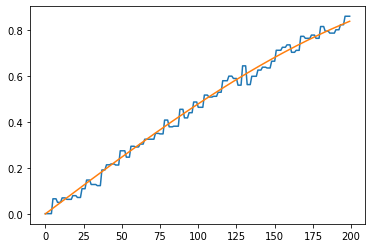

In [6]:
plt.plot(pre_vec)
plt.plot(Y_test_true)

In [7]:
ERT_model=RegressionTree(estimator="extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0006658819683385687

In [8]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.0007298776424295655

In [9]:
node_range,dt_X, dt_Y,sorted_ratio,sorted_prediction,intercept= ERT_model.get_node_information(9)

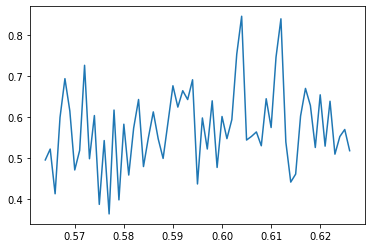

In [10]:
plt.plot(dt_X.ravel(),dt_Y.ravel())

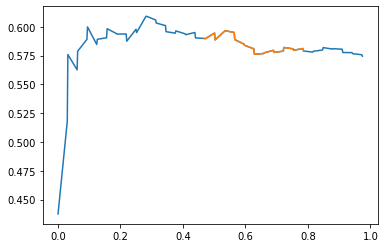

In [11]:
plt.plot(sorted_ratio,sorted_prediction)
plt.plot(sorted_ratio[int(len(sorted_ratio)*0.45):int(len(sorted_ratio)*0.8)],sorted_prediction[int(len(sorted_prediction)*0.45):int(len(sorted_prediction)*0.8)])


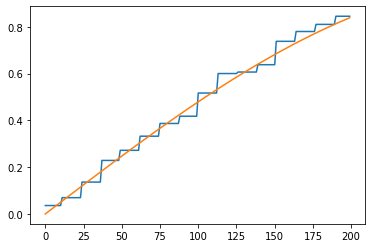

In [12]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

# only index at center

In [13]:


def compute_MSE_node_central(model,func):
    X_test=model.tree_.node_range.mean(axis=1)
    X_test=np.array(X_test)
    Y_hat=model.predict(X_test)
    
    Y_true=func(X_test).ravel()

   
    return MSE(Y_hat,Y_true)
    

In [14]:
compute_MSE_node_central(ERT_model,np.sin)
compute_MSE_node_central(RT_model,np.sin)

0.0008487394025040297

0.00048705378442812395

In [15]:
## repeat experiment
error_RT=0
error_ERT=0
for seed in range(50):
    np.random.seed(seed)
    func=np.sin
    #X_train,pdf_X_train=density.generate(1000)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = func(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = func(X_test).ravel()
    min_samples_split=120
    max_depth=6
    RT_model=RegressionTree(estimator="naive_estimator",
                            splitter="midpoint",
                            min_samples_split=min_samples_split,
                            max_depth=max_depth,
                            random_state=1)
    RT_model.fit(X_train,Y_train)
    ERT_model=RegressionTree(estimator="extrapolation_estimator",
                             splitter="midpoint",
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             order=1,
                             random_state=1,
                             truncate_ratio_low=0.45,
                             truncate_ratio_up=0.8)
    ERT_model.fit(X_train,Y_train)
    
    error_RT+=compute_MSE_node_central(ERT_model,func)
    error_ERT+=compute_MSE_node_central(RT_model,func)

In [16]:
error_RT
error_ERT

0.04297188407679876

0.02617943566743878

# Pointwise Extrapolation Estimator

In [3]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005780942929730944

In [18]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00032587283371684215

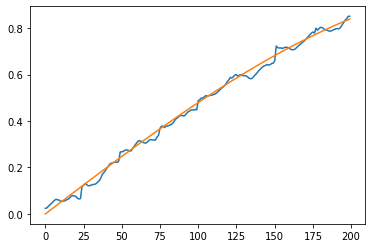

In [19]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Numba Acceleration

In [6]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8,
                        numba_acc=0)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005857000985224971

In [7]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                            numba_acc=0)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00032789852982465986

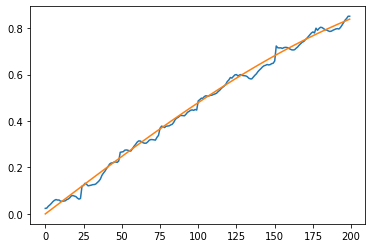

In [8]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Parallel Computation

In [3]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8,
                        parallel_jobs=1)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005857000985224971

In [5]:
from time import time

In [7]:
time_s=time()
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         parallel_jobs=8)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

time_s=time()
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         parallel_jobs=0)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

0.00012188304213675589

time used : 57.92785716056824 s


0.00012188304213675589

time used : 409.89631700515747 s


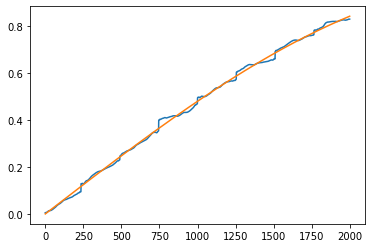

In [8]:
plt.plot(Y_hat)
plt.plot(Y_test_true)